In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM model with RBF kernel
model = SVC(kernel='rbf', C=1.5, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.845
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        93
           1       0.89      0.81      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



### Plot decision boundary

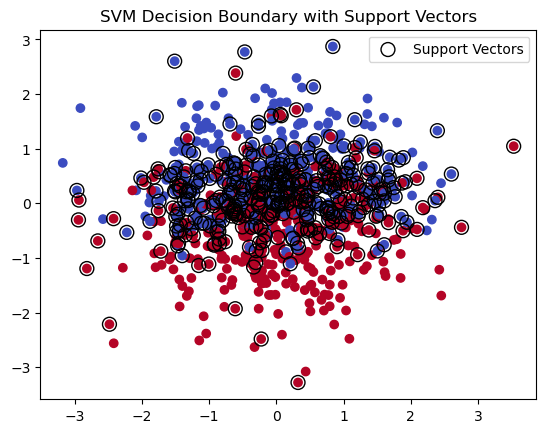

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, edgecolors='k', facecolors='none', label="Support Vectors")
plt.legend()
plt.title("SVM Decision Boundary with Support Vectors")
plt.show()

### Make Moons Dataset

In [4]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plot X_test points

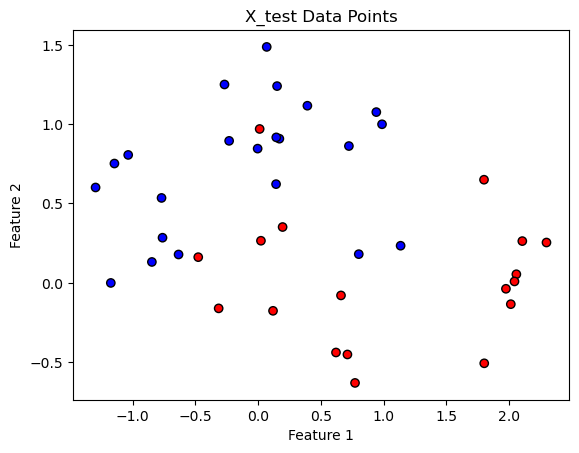

In [5]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("X_test Data Points")  
plt.show()

In [6]:
# Define different kernel models
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

### Poltting different kernels

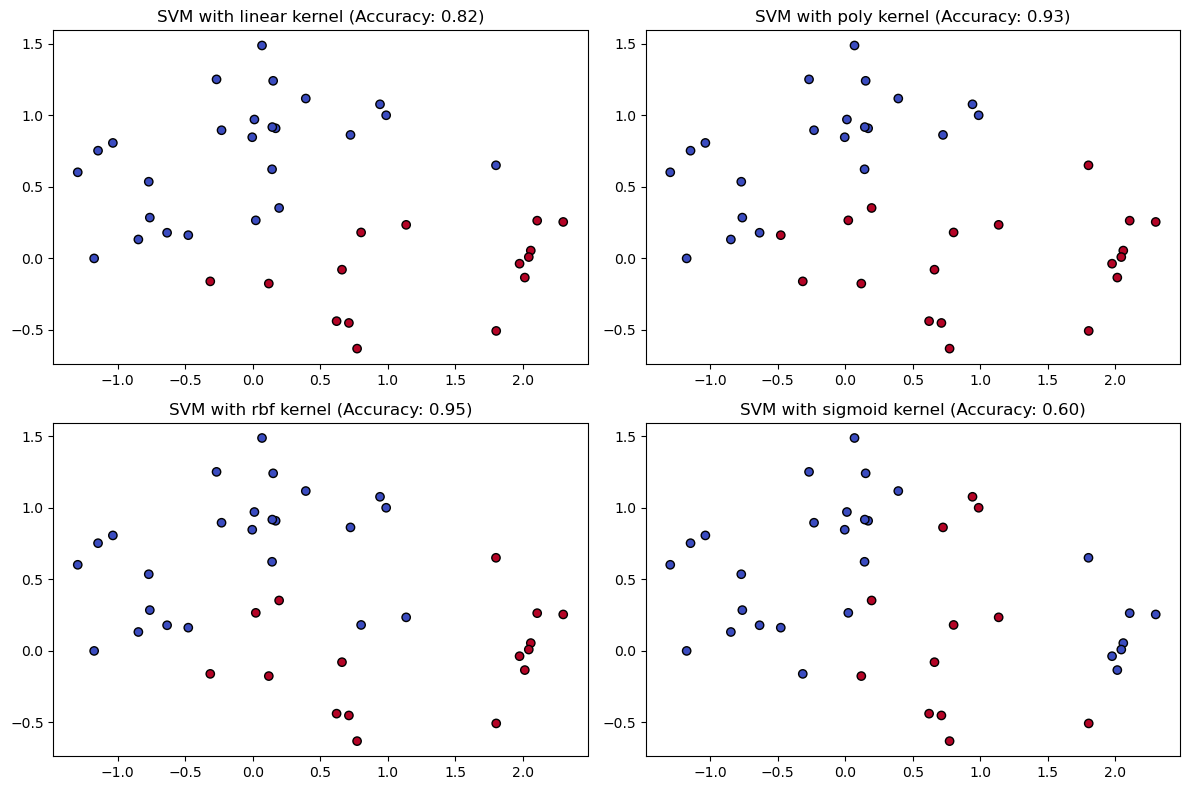

In [7]:
plt.figure(figsize=(12, 8))

for i, kernel in enumerate(kernels, 1):
    # Train SVM model with different kernels
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)

    # Plot decision boundary
    plt.subplot(2, 2, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolors='k')
    plt.title(f"SVM with {kernel} kernel (Accuracy: {acc:.2f})")

plt.tight_layout()
plt.show()

### Grid Search with Cross-Validation

In [8]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 0.01, 0.1, 1, 10], 
    'kernel': ['rbf']
}

In [9]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}


### Randomized Search

In [10]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define random search space
param_dist = {
    'C': np.logspace(-2, 2, 10), 
    'gamma': np.logspace(-3, 2, 10),
    'kernel': ['rbf']
}

# Perform Random Search
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'kernel': 'rbf', 'gamma': 2.1544346900318843, 'C': 12.915496650148826}
